In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set matplotlib to display plots inline
%matplotlib inline

# Load the dataset
file_path = './data/raw/stock_data.csv' 
df = pd.read_csv(file_path, index_col=0, parse_dates=True)

# Show the first few rows to verify
df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,symbol,log_return
date,,,,,,,,,
2024-03-01 00:00:00-05:00,178.706190,179.681580,176.546390,178.815674,73488000,0.0,0.0,AAPL,NaN
2024-03-04 00:00:00-05:00,175.322168,176.068644,172.973259,174.277115,81510100,0.0,0.0,AAPL,-0.025709
2024-03-05 00:00:00-05:00,169.957487,171.231471,168.822845,169.320496,95132400,0.0,0.0,AAPL,-0.028853
2024-03-06 00:00:00-05:00,170.256065,170.435227,167.887245,168.325180,68587700,0.0,0.0,AAPL,-0.005896
2024-03-07 00:00:00-05:00,168.355038,169.927615,167.698152,168.205750,71765100,0.0,0.0,AAPL,-0.000710


In [2]:
# Reshape data from long format to wide format

# Convert from long format to wide format: each stock becomes a column
returns_wide = df.pivot_table(index=df.index, columns='symbol', values='log_return')

# Remove any dates with missing returns
returns_wide.dropna(inplace=True)

# Check the structure of the new DataFrame
print("Shape of wide-format return matrix:", returns_wide.shape)
returns_wide.head()


Shape of wide-format return matrix: (265, 103)


symbol,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADP,AEE,AEP,...,TMO,TRV,TXN,UNH,UPS,V,VLO,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2024-03-04 00:00:00-05:00,-0.025709,-0.010451,0.011900,-0.000344,0.007114,-0.005251,-0.002975,-0.014076,0.018752,-0.000471,...,0.009171,0.001142,0.008094,-0.015771,0.017076,-0.009331,0.009862,0.002733,0.009148,-0.014082
2024-03-05 00:00:00-05:00,-0.028853,0.011847,-0.013081,0.002865,-0.017960,-0.041524,-0.025284,-0.008976,-0.007597,-0.010651,...,0.005093,0.000274,-0.010493,-0.018262,-0.006328,-0.004108,-0.002699,0.000992,0.012402,0.012191
2024-03-06 00:00:00-05:00,-0.005896,0.010549,0.007232,0.016231,0.010426,-0.003217,0.009961,-0.000984,0.013771,-0.001548,...,0.011717,0.006777,0.007182,-0.001163,0.019126,0.003751,0.000900,-0.010463,0.008789,0.010640
2024-03-07 00:00:00-05:00,-0.000710,-0.002710,0.013153,-0.012804,0.015839,0.023565,0.033547,0.007768,-0.000547,0.002143,...,0.010360,-0.001002,0.019589,0.012992,0.005622,-0.007768,0.031284,-0.010068,-0.003473,0.005604
2024-03-08 00:00:00-05:00,0.010185,-0.009571,0.000331,-0.000913,-0.022848,-0.007854,-0.011670,-0.007603,-0.000958,-0.003096,...,-0.000084,-0.004339,-0.017091,-0.000692,0.003579,0.006376,0.003349,-0.000506,-0.003984,0.009363


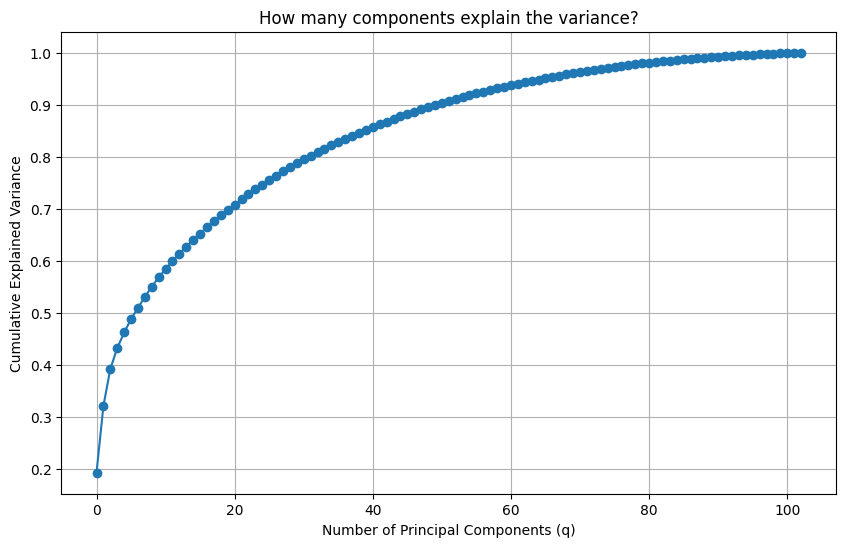

In [3]:
# Standardize the return data and apply PCA

# Standardize the returns (mean=0, std=1) for each stock
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns_wide)

# Apply PCA
pca = PCA()
pca.fit(returns_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance to choose q
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Principal Components (q)')
plt.ylabel('Cumulative Explained Variance')
plt.title('How many components explain the variance?')
plt.grid(True)
plt.show()


In [9]:
# Select top q stocks (for q=10 and q=20) based on PCA contribution

# Define q values to test
q_values = [10, 20]

# Dictionary to store selected stock symbols for each q
top_q_stock_dict = {}

for q in q_values:
    # Get the first q principal components
    pca_components_subset = pca.components_[:q]

    # Sum the absolute values of each stock's loading across the top q components
    stock_scores = np.abs(pca_components_subset).sum(axis=0)

    # Map to stock symbols
    scores_series = pd.Series(stock_scores, index=returns_wide.columns)

    # Select top q stocks
    top_stocks = scores_series.sort_values(ascending=False).head(q).index.tolist()

    # Store in the dictionary
    top_q_stock_dict[q] = top_stocks

    print(f"\nTop {q} stocks selected based on PCA contribution:")
    print(top_stocks)



Top 10 stocks selected based on PCA contribution:
['CB', 'HD', 'DHR', 'ACGL', 'TMO', 'LOW', 'TRV', 'GS', 'UPS', 'MSFT']

Top 20 stocks selected based on PCA contribution:
['BA', 'PM', 'UPS', 'LLY', 'VZ', 'MRK', 'DHR', 'LOW', 'ABT', 'ABBV', 'NKE', 'IBM', 'HD', 'UNH', 'TRV', 'SBUX', 'INTC', 'LMT', 'REGN', 'TMO']


In [10]:
# equal-weighted (q=10 and q=20)

# Dictionary to hold daily return series for each PCA portfolio
pca_index_dict = {}

for q in q_values:
    selected_stocks = top_q_stock_dict[q]  # the stocks chosen for this q
    
    # Subset returns for selected stocks
    selected_returns = returns_wide[selected_stocks]
    
    # Equal weight for each stock
    weights = np.repeat(1/q, q)
    
    # Compute portfolio daily returns
    index_returns = selected_returns.dot(weights)
    
    # Store in dictionary
    pca_index_dict[q] = pd.DataFrame(index_returns, columns=[f'PCA_Index_{q}'])

# Combine all portfolios into one DataFrame for easier comparison later
pca_combined_df = pd.concat([pca_index_dict[q] for q in q_values], axis=1)

# Show preview
pca_combined_df.head()


,PCA_Index_10,PCA_Index_20
date,,
2024-03-04 00:00:00-05:00,0.000676,0.001455
2024-03-05 00:00:00-05:00,-0.004453,-0.007631
2024-03-06 00:00:00-05:00,0.005245,0.005928
2024-03-07 00:00:00-05:00,0.001464,0.003985
2024-03-08 00:00:00-05:00,-0.002195,-0.004767


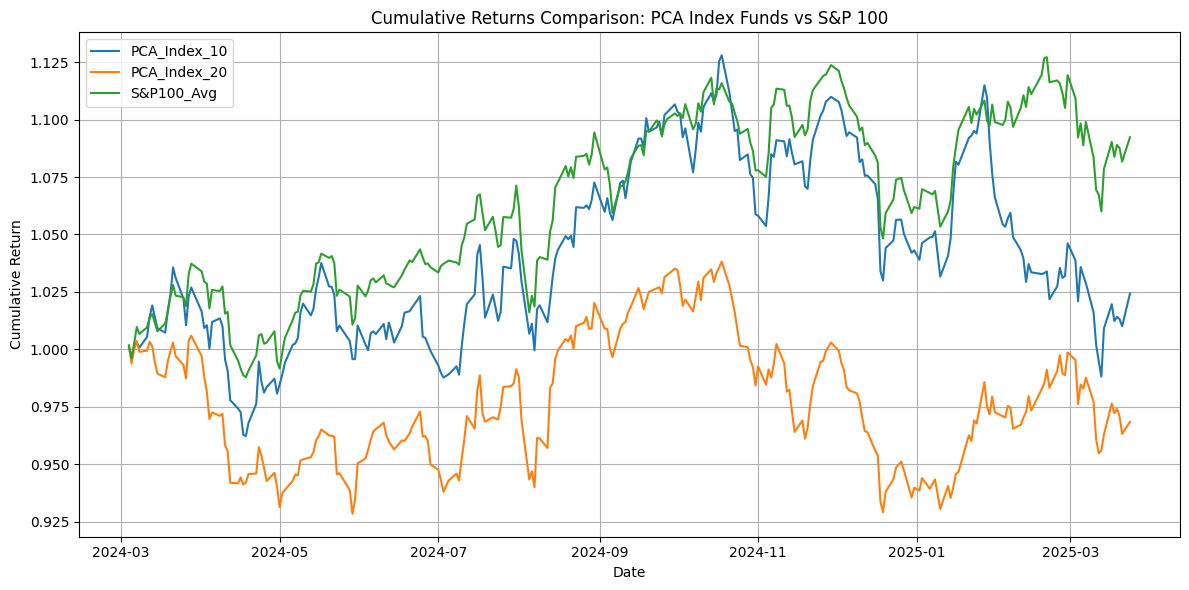


Correlation with S&P 100 Average Return:
PCA_Index_10 vs Benchmark: 0.8267
PCA_Index_20 vs Benchmark: 0.8328


In [11]:
# Visualize and evaluate the performance of PCA-based index funds

# Step 1: Create the benchmark - average log return of all stocks
benchmark_return = returns_wide.mean(axis=1)
benchmark_cum = (1 + benchmark_return).cumprod()
benchmark_cum.name = 'S&P100_Avg'

# Step 2: Compute cumulative returns for PCA portfolios
cumulative_returns = pca_combined_df.add(1).cumprod()

# Add benchmark for comparison
cumulative_returns = pd.concat([cumulative_returns, benchmark_cum], axis=1)

# Step 3: Plot the cumulative returns
plt.figure(figsize=(12, 6))
for column in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)

plt.title("Cumulative Returns Comparison: PCA Index Funds vs S&P 100")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Correlation between PCA index and benchmark
print("\nCorrelation with S&P 100 Average Return:")
for q in q_values:
    corr = pca_combined_df[f'PCA_Index_{q}'].corr(benchmark_return)
    print(f"PCA_Index_{q} vs Benchmark: {corr:.4f}")


In [ ]:

benchmark_return = returns_wide.mean(axis=1)

results = []

for q in q_values:
    label = f'PCA_Index_{q}'
    returns_series = pca_combined_df[label]

    correlation = returns_series.corr(benchmark_return)
    tracking_error = np.std(returns_series - benchmark_return)
    mean_return = returns_series.mean()
    std_dev = returns_series.std()
    sharpe_ratio = mean_return / std_dev if std_dev != 0 else np.nan

    results.append({
        "Portfolio": label,
        "Mean Return": mean_return,
        "Standard Deviation": std_dev,
        "Sharpe Ratio": sharpe_ratio,
        "Correlation w/ Benchmark": correlation,
        "Tracking Error": tracking_error
    })

performance_df = pd.DataFrame(results)

# 
performance_df = pd.DataFrame(results)

# 
print(performance_df) 
performance_df.to_csv("pca_portfolio_performance.csv", index=False) 


      Portfolio  Mean Return  Standard Deviation  Sharpe Ratio  \
0  PCA_Index_10     0.000125            0.008294      0.015031   
1  PCA_Index_20    -0.000094            0.007409     -0.012664   

   Correlation w/ Benchmark  Tracking Error  
0                  0.826741        0.004658  
1                  0.832754        0.004137  
